In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [169]:
df=pd.read_csv("TrainDataset.csv")
df.head()

,v1,v2
0,spam,U were outbid by simonwatson5120 on the Shinco...
1,ham,Do you still have the grinder?
2,ham,No. Yes please. Been swimming?
3,ham,No de.am seeing in online shop so that i asked.
4,ham,"Faith makes things possible,Hope makes things ..."


In [170]:
print(df.isnull().sum())
len(df)

v1    0
v2    0
dtype: int64


4457

In [171]:
df['v1'].value_counts()

ham     3868
spam     589
Name: v1, dtype: int64

In [172]:
ham = df[df["v1"]=="ham"]
ham

,v1,v2
1,ham,Do you still have the grinder?
2,ham,No. Yes please. Been swimming?
3,ham,No de.am seeing in online shop so that i asked.
4,ham,"Faith makes things possible,Hope makes things ..."
5,ham,Hey u still at the gym?
6,ham,Where is that one day training:-)
7,ham,"Did I forget to tell you ? I want you , I need..."
8,ham,I dont thnk its a wrong calling between us
10,ham,That way transport is less problematic than on...
11,ham,"Storming msg: Wen u lift d phne, u say \HELLO\..."


In [173]:
spam = df[df["v1"]=="spam"]
spam

,v1,v2
0,spam,U were outbid by simonwatson5120 on the Shinco...
9,spam,December only! Had your mobile 11mths+? You ar...
15,spam,"UpgrdCentre Orange customer, you may now claim..."
19,spam,YOUR CHANCE TO BE ON A REALITY FANTASY SHOW ca...
29,spam,Double mins and txts 4 6months FREE Bluetooth ...
32,spam,Adult 18 Content Your video will be with you s...
34,spam,Free Top ringtone -sub to weekly ringtone-get ...
37,spam,Natalja (25/F) is inviting you to be her frien...
52,spam,PRIVATE! Your 2003 Account Statement for shows...
68,spam,For ur chance to win å£250 cash every wk TXT: ...


In [174]:
ham.shape, spam.shape

((3868, 2), (589, 2))

In [175]:
ham = ham.sample(spam.shape[0])
ham.shape, spam.shape

((589, 2), (589, 2))

In [176]:
data = ham.append(spam, ignore_index=True)
print(data.head())
print(data.tail())

    v1                                                 v2
0  ham  HIYA STU WOT U UP 2.IM IN SO MUCH TRUBLE AT HO...
1  ham  Ok but tell me half an hr b4 u come i need 2 p...
2  ham                          U still painting ur wall?
3  ham  Message:some text missing* Sender:Name Missing...
4  ham  Ok i found dis pierre cardin one which looks n...
        v1                                                 v2
1173  spam  You have won ?1,000 cash or a ?2,000 prize! To...
1174  spam  IMPORTANT MESSAGE. This is a final contact att...
1175  spam  FreeMsg Hi baby wow just got a new cam moby. W...
1176  spam  You've won tkts to the EURO2004 CUP FINAL or å...
1177  spam  Text PASS to 69669 to collect your polyphonic ...


In [177]:
X=data["v2"]
y=data["v1"]

def classify(model, X, y):
    
    global clf, X_train, X_test, y_train, y_test
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, stratify=y)
    clf=Pipeline([("tfidf", TfidfVectorizer()), ("clf", model)])
    clf.fit(X_train, y_train)
    
    y_pred=clf.predict(X_test)
    
    plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  
    plt.show()
    
    print(classification_report(y_test, y_pred))
    print("Accuracy: ", clf.score(X_test, y_test)*100)
    
    


In [178]:
### Logistic Regression

C:\Anaconda3\envs\sms_spam\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


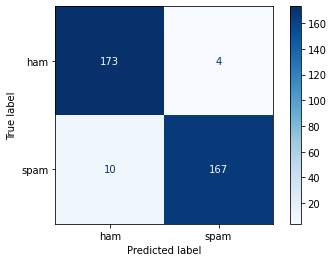

              precision    recall  f1-score   support

         ham       0.95      0.98      0.96       177
        spam       0.98      0.94      0.96       177

    accuracy                           0.96       354
   macro avg       0.96      0.96      0.96       354
weighted avg       0.96      0.96      0.96       354

Accuracy:  96.045197740113


In [179]:
model=LogisticRegression()
classify(model, X, y)

In [180]:
clf.predict(["You have won a free ticket for USA. Text to 123456"])

array(['spam'], dtype=object)

In [181]:
### Naive Bayes

C:\Anaconda3\envs\sms_spam\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


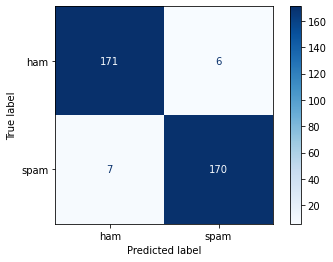

              precision    recall  f1-score   support

         ham       0.96      0.97      0.96       177
        spam       0.97      0.96      0.96       177

    accuracy                           0.96       354
   macro avg       0.96      0.96      0.96       354
weighted avg       0.96      0.96      0.96       354

Accuracy:  96.32768361581921


In [182]:
model=MultinomialNB()
classify(model, X, y)

In [183]:
clf.predict(["You have won a free ticket for USA. Text to 123456"])

array(['spam'], dtype='<U4')

In [184]:
### Decision Tree

C:\Anaconda3\envs\sms_spam\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


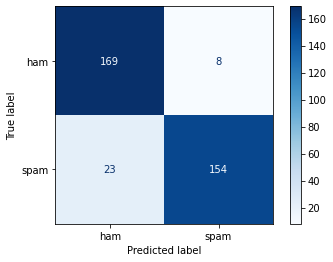

              precision    recall  f1-score   support

         ham       0.88      0.95      0.92       177
        spam       0.95      0.87      0.91       177

    accuracy                           0.91       354
   macro avg       0.92      0.91      0.91       354
weighted avg       0.92      0.91      0.91       354

Accuracy:  91.24293785310734


In [185]:
model=DecisionTreeClassifier()
classify(model, X, y)

In [186]:
clf.predict(["You have won a free ticket for USA. Text to 123456"])

array(['spam'], dtype=object)

In [187]:
### SVM

C:\Anaconda3\envs\sms_spam\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


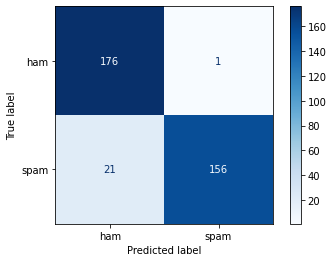

              precision    recall  f1-score   support

         ham       0.89      0.99      0.94       177
        spam       0.99      0.88      0.93       177

    accuracy                           0.94       354
   macro avg       0.94      0.94      0.94       354
weighted avg       0.94      0.94      0.94       354

Accuracy:  93.78531073446328


In [188]:
model=SVC(C=100, gamma="auto")
classify(model, X, y)

In [189]:
clf.predict(["You have won a free ticket for USA. Text to 123456"])

array(['spam'], dtype=object)

In [190]:
### KNN

C:\Anaconda3\envs\sms_spam\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


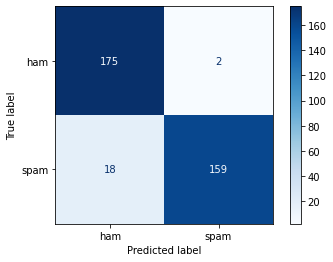

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       177
        spam       0.99      0.90      0.94       177

    accuracy                           0.94       354
   macro avg       0.95      0.94      0.94       354
weighted avg       0.95      0.94      0.94       354

Accuracy:  94.35028248587571


In [191]:
model=KNeighborsClassifier(n_neighbors=5)
classify(model, X, y)

In [192]:
clf.predict(["You have won a free ticket for USA. Text to 123456"])

array(['spam'], dtype=object)

C:\Anaconda3\envs\sms_spam\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


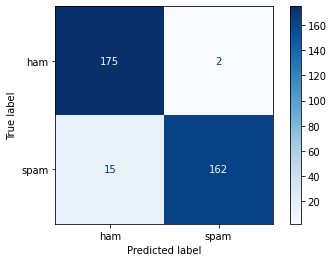

              precision    recall  f1-score   support

         ham       0.92      0.99      0.95       177
        spam       0.99      0.92      0.95       177

    accuracy                           0.95       354
   macro avg       0.95      0.95      0.95       354
weighted avg       0.95      0.95      0.95       354

Accuracy:  95.19774011299435


In [193]:
model=RandomForestClassifier(n_estimators=100, n_jobs=-1)
classify(model, X, y)

In [194]:
clf.predict(["You have won a free ticket for USA. Text to 123456"])

array(['spam'], dtype=object)